In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("train.csv")
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


# Checking the type of data in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Checking for null values

In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

As we see that there are no null values in our dataset, we can now carry on without imputations

In [6]:
df.drop(['id'],axis = 1,inplace=True)

In [7]:
df.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


# Considering one feature at a time

## Gender

In [ ]:
import seaborn as sns
df3 = df.copy()
df3["Response"] = np.where(df["Response"]==1,"Yes","No")
sns.pairplot(df3,hue = "Response")

Has only two values 'Male' and 'Female'.
Next lets, check the count of each and the ratio of male and female in the data.

Apart from vehicle age all the other categorical datas are almost evenly distributed

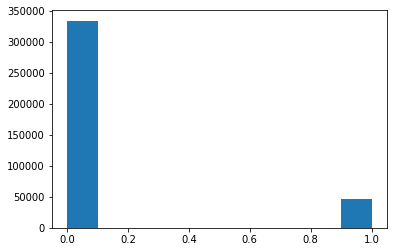

In [9]:
plt.hist(df['Response'])
plt.show()

In [10]:
df_1 = df[df["Response"]==1]
len(df_1)

46710

In [11]:
df_0 = df[df["Response"]==0]
len(df_0)

334399

In [12]:
df_00 = df_0.sample(n=len(df_1))
len(df_00)

46710

In [13]:
df = df_1.append(df_00)
df = df.reset_index(drop=True)
len(df)

93420

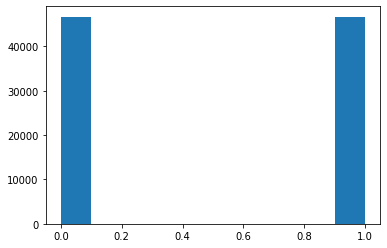

In [14]:
plt.hist(df['Response'])
plt.show()

Gender


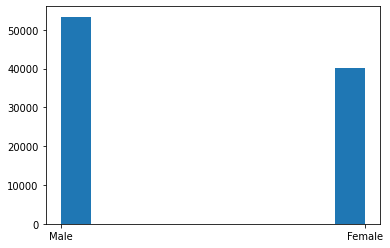

Vehicle_Age


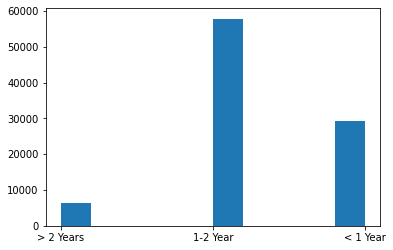

Vehicle_Damage


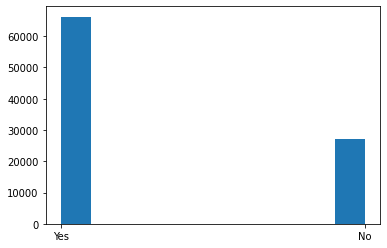

In [15]:
for i in df.columns:
    if df[i].dtype == object:
        print(i)
        plt.hist(df[i])
        plt.show()

# Checking for correlation of data

In [16]:
y = df['Response']
x = df.drop(['Response'],axis=1)

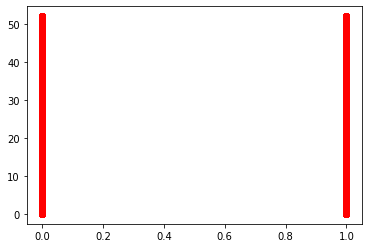

In [17]:
plt.rcParams['agg.path.chunksize'] = 100000
plt.plot(df['Response'],df['Region_Code'],'ro')
plt.show()

## Linear Correlatiom

In [18]:
df.corr(method='spearman')

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.056742,0.005924,-0.287848,0.127482,-0.577961,-0.000997,0.221960
Driving_License,-0.056742,1.000000,0.000728,0.000727,-0.010884,0.032348,-0.001956,0.019600
Region_Code,0.005924,0.000728,1.000000,0.001362,-0.037187,-0.008902,-0.004715,0.002595
Previously_Insured,-0.287848,0.000727,0.001362,1.000000,-0.040049,0.229051,-0.001042,-0.589033
Annual_Premium,0.127482,-0.010884,-0.037187,-0.040049,1.000000,-0.236068,0.003243,0.052407
Policy_Sales_Channel,-0.577961,0.032348,-0.008902,0.229051,-0.236068,1.000000,-0.000227,-0.208221
Vintage,-0.000997,-0.001956,-0.004715,-0.001042,0.003243,-0.000227,1.000000,-0.001320
Response,0.221960,0.019600,0.002595,-0.589033,0.052407,-0.208221,-0.001320,1.000000


## Scatter plot

In [ ]:
fig,axes = plt.subplot(nrows = len(df), ncols = 1)
for i in df.columns:
    axes[j][0].scatter()

# Label Encoding

In [20]:
def label(df):
    df1 = df.copy()
    lab = LabelEncoder()
    for i in df1.columns:
        if df[i].dtype == object:
            df1[i] = lab.fit_transform(df[i]).astype('float64')
    return df1

# One Hot Encoding

In [21]:
def one(df):
    df2 = df.copy()
    for i in df2.columns:
        if df2[i].dtype == object:
            d = pd.get_dummies(df2[i],prefix = i)
            df2.drop(i,axis=1,inplace=True)
            df2 = df2.join(d)
    return(df2)

# Splitting data into training and testing

In [67]:
df2 = one(df)
#df2 = label(df)
#df2 = df.copy()
x = df2.drop('Response',axis=1)
y = df2['Response'] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [68]:
set(y_train)

{0, 1}

# Preparing data for PyTorch

## Changing the data to tensor form

In [24]:
def tens(a):
    
    return(torch.FloatTensor(a.values))

In [69]:
x_train = tens(x_train)    #.values was necessary because torch requires the data 
x_test = tens(x_test)      # to be in the form of an array and not a dataframe
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [70]:
N = df2.shape[1]-1

In [125]:
from torch import nn
class NeuralNet(nn.Module):
    def __init__(self,in_features=8,out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features=in_features,out_features=20)
        self.fc2 = nn.Linear(in_features=20,out_features=20)
        self.fc3 = nn.Linear(in_features=20,out_features=out_features)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [122]:
#torch.manual_seed(42)
model = NeuralNet()
model.parameters


<bound method Module.parameters of NeuralNet(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=2, bias=True)
)>

In [96]:
lf = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.1)

In [ ]:
import torch.nn.functional as F
epochs =50
fl = []
for i in range(epochs):
    y_cap = model.forward(x_train)
    l = lf(y_cap,y_train)
    print(l.item())
    fl.append(l)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

In [98]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred)

In [ ]:
set(predictions)

In [52]:
from sklearn.metrics import confusion_matrix as cm
c = cm(y_test,predictions)
c

array([[14029,     0],
       [13997,     0]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score as ac
score = ac(y_test,predictions)

In [62]:
score

0.5031756226361236

In [102]:
x_val = pd.read_csv("test.csv")
id = x_val["id"]
x_val = x_val.drop("id",axis=1)
x_val = one(x_val)
x_val = tens(x_val)
x_val.shape

torch.Size([127037, 14])

In [ ]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(x_val):
        print(model(data))
        y_pred = model(data).argmax().item()
        predictions.append(y_pred)

In [109]:
df4 = pd.read_csv("diabetes.csv")
x = df4.drop("Outcome",axis=1).values
y = df4['Outcome'].values

In [110]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [119]:
N = df4.shape[1]-1
N

8

In [126]:
epochs =100
fl = []
for i in range(epochs):
    y_cap = model.forward(X_train)
    l = lf(y_cap,y_train)
    print(l.item())
    fl.append(l)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284088135
1.3338587284